## Third project: Three Math Games

### 1. Scatter plot game
- Randomly generate points on a graph and the player has to input the (x,y) coordinates
- For added difficulty, make the graph larger


Welcome to the scatter plot guessing game!
There will now be displayed a graph with 5 dots. 
Your task is to gues their coordinates.
Enter '1' for easy dificulty or '2' for a harder one (bigger graph) >>>> 2
How many dots do you want to guess? Enter a positive integer >>>  2


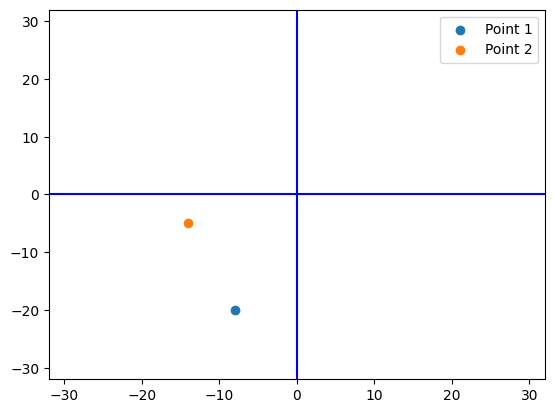

For point number 1, type in the coordinates separated by a comma: 
 x,y = -8,-20
WOW you got that one exactly right!!
For point number 2, type in the coordinates separated by a comma: 
 x,y = -15,-5
Close one, good job!


In [ ]:
import matplotlib.pyplot as plt
import random

print("Welcome to the scatter plot guessing game!\nThere will now be displayed a graph with 5 dots. \nYour task is to gues their coordinates.")
difficulty = int(input("Enter '1' for easy dificulty or '2' for a harder one (bigger graph) >>>> "))

if difficulty == 2:
  xmin = - 30
  ymin = -30
  xmax = 30
  ymax = 30

else:
  xmin = -10
  ymin = -10
  xmax = 10
  ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin-2,xmax+2,ymin-2,ymax+2])
plt.plot([xmin-2,xmax+2],[0,0], 'b')
plt.plot([0,0],[ymin-2,ymax+2], 'b')

number_of_dots = int(input("How many dots do you want to guess? Enter a positive integer >>>  "))
real_coords = []
for i in range(0, number_of_dots):
  x = random.randint(xmin + 1, xmax + 1)
  y = random.randint(ymin + 1, ymax - 1)
  real_coords.append([x,y])
  plt.scatter(x=x, y=y, label=f"Point {i+1}")

plt.legend()
plt.show()

for j in range(1, number_of_dots+1):
  print(f"For point number {j}, type in the coordinates separated by a comma: ")
  inputs = input(" x,y = ")
  coords = inputs.split(",")
  if real_coords[j-1] == [int(coords[0]), int(coords[1])]:
    print("WOW you got that one exactly right!!")
  elif abs(real_coords[j-1][0] - int(coords[0])) < 2 and abs(real_coords[j-1][1] - int(coords[1])) < 2:
    print("Close one, good job!")
  else:
    print("Oops, that was not quite right...")


### 2. Algebra practice game
- Generate one-step and two-step problems with random integer values and the player has to input the answer
- Use positive and negative values. For added difficulty, make the numbers larger

In [ ]:
import random
import sympy

def algebra_practice(difficulty):
    if difficulty == 1:
        xmin = -10
        xmax = 10
    elif difficulty == 2:
        xmin = -50
        xmax = 50
    else:
        print("Invalid difficulty selected!")
        return

    a = random.randint(xmin, xmax)
    while a == 0:  # Ensure 'a' is not zero to avoid invalid equations
        a = random.randint(xmin, xmax)
    b = random.randint(xmin, xmax)
    c = random.randint(xmin, xmax)

    steps = random.randint(1, 2)
    x = sympy.symbols('x')

    if steps == 1:
        print("One step!")
        print(f"Equation is {a}x = {b}")
        try:
            user_solution = sympy.Rational(input("x = "))
        except ValueError:
            print("Invalid input. Please enter a valid number or fraction (e.g., 3/4).")
            return
        equation = sympy.Eq(a * x, b)
        solution = sympy.solve(equation, x)[0]
    elif steps == 2:
        print("Two steps!")
        print(f"Equation is {a}x + ({b}) = {c}")
        try:
            user_solution = sympy.Rational(input("x = "))
        except ValueError:
            print("Invalid input. Please enter a valid number or fraction (e.g., 3/4).")
            return
        equation = sympy.Eq(a * x + b, c)
        solution = sympy.solve(equation, x)[0]

    print("\n------------------------------\n")
    if user_solution == solution:
        print("YAYYYY you got it!!")
    else:
        print(f"Oops, the solution was actually {solution}")

difficulty = int(input("First, choose your difficulty - for easy [-10, 10] enter 1 and for harder [-50, 50] enter 2 >>>> "))
algebra_practice(difficulty)


First, choose your difficulty - for easy [-10, 10] enter 1 and for harder [-50, 50] enter 2 >>>> 1
Two steps!
Equation is 5x + (8) = -6
x = -14/5

------------------------------

YAYYYY you got it!!


### 3. Projectile game
- Display a "wall" with random height and location. Player has to move sliders to adjust a parabolic path to clear the wall
- For added difficulty, make a second level where players enter a, b, and c without sliders

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import random as rd

wall_height = rd.randint(3, 7)
wall_x_coordinate = rd.randint(3, 8)

def projectile_game(a, b, c, zoom):
    xmin = 0
    xmax = zoom
    ymin = 0
    ymax = zoom
    x = np.linspace(xmin, xmax, 500)
    y = a * x**2 + b * x + c

    plt.figure(figsize=(8, 6))
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([xmin, xmax], [0, 0], 'b')
    plt.plot([0, 0], [ymin, ymax], 'b')

    plt.plot([wall_x_coordinate, wall_x_coordinate], [0, wall_height], 'green', linewidth=2)
    plt.plot(x, y, 'red', label="Projectile Path")

    y_at_wall = a * wall_x_coordinate**2 + b * wall_x_coordinate + c
    if y_at_wall > wall_height:
        plt.text(1, ymax - 1, "Success! You cleared the wall!", color='green', fontsize=12)
    else:
        plt.text(1, ymax - 1, "Oh no! You hit the wall!", color='red', fontsize=12)

    plt.title("Projectile Game")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

def manual_input_game():
    a = float(input("Enter coefficient a (negative value): "))
    b = float(input("Enter coefficient b: "))
    c = float(input("Enter coefficient c: "))

    xmin = 0
    xmax = 10
    ymin = 0
    ymax = 10
    x = np.linspace(xmin, xmax, 500)
    y = a * x**2 + b * x + c
    y_at_wall = a * wall_x_coordinate**2 + b * wall_x_coordinate + c

    plt.figure(figsize=(8, 6))
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([xmin, xmax], [0, 0], 'b')
    plt.plot([0, 0], [ymin, ymax], 'b')

    plt.plot([wall_x_coordinate, wall_x_coordinate], [0, wall_height], 'green', linewidth=2)
    plt.plot(x, y, 'red', label="Projectile Path")

    if y_at_wall > wall_height:
        print("Success! You cleared the wall!")
    else:
        print("Oh no! You hit the wall!")

    plt.title("Manual Input Mode")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

choice = input("Choose your mode: (1) Play with sliders (2) Enter coefficients manually: ")

if choice == "1":
    interactive_plot = interactive(
        projectile_game,
        a=(-10.0, 0.0, 0.1),  # Slider for a (must be negative)
        b=(0.0, 10.0, 0.1),   # Slider for b
        c=(0.0, 5.0, 0.1),    # Slider for c
        zoom=(10, 20, 1)      # Slider for zoom level
    )
    display(interactive_plot)
elif choice == "2":
    manual_input_game()
else:
    print("Invalid choice! Please restart the game.")


Choose your mode: (1) Play with sliders (2) Enter coefficients manually: 1


interactive(children=(FloatSlider(value=-5.0, description='a', max=0.0, min=-10.0), FloatSlider(value=5.0, des…